In [2]:
#!pip install plotly

import numpy as np
import pandas as pd
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans

plotly.tools.set_credentials_file(username='iremoze', api_key='pRAt4yKgtusULCVgagiv')


In [5]:
data = pd.read_csv("last.txt")
data.columns = ("a","b")
data.index


RangeIndex(start=0, stop=2646529, step=1)

In [6]:
df1 = data.head(10000)

In [7]:
trace0 = go.Scatter(
    x = df1['a'],
    y = df1['b'],
    mode = 'markers',
    name = 're'
)
data = [trace0]

py.iplot(data, filename='scatter-mode')

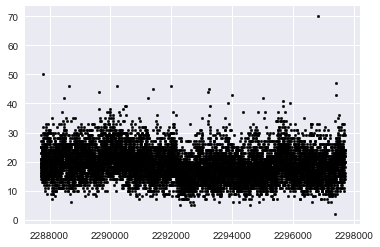

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets.samples_generator import make_blobs

f1 = df1['a'].values
f2 = df1['b'].values
X = np.array (list(zip(f1,f2)))
plt.scatter(f1,f2, c= 'black' , s=7)


In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(f2)
y_kmeans = kmeans.predict(f2)

ValueError: Expected 2D array, got 1D array instead:
array=[15. 19. 25. ... 29. 24. 20.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');


In [ ]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

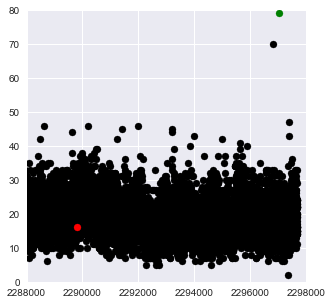

In [10]:
np.random.seed(200)
k = 2
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(2288000, 2298000), np.random.randint(0, 80)]
    for i in range(k)
}
    
fig = plt.figure(figsize=(5, 5))
plt.scatter(df1['a'], df1['b'], color='k')
colmap = {1: 'r', 2: 'g'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(2288000, 2298000)
plt.ylim(0, 80)
plt.show()

            a   b  distance_from_1  distance_from_2  closest color
5723  2293428  12      3610.002216      3608.622036        2     g
5724  2293429  11      3611.003462      3607.640919        2     g
5725  2293430  18      3612.000554      3606.515909        2     g
5726  2293431  18      3613.000554      3605.516052        2     g
5727  2293432  17      3614.000138      3604.533257        2     g
5728  2293433  20      3615.002213      3603.483037        2     g
5729  2293434  22      3616.004978      3602.450971        2     g
5730  2293435  29      3617.023362      3601.347109        2     g
5731  2293436  10      3618.004975      3600.661189        2     g
5732  2293437  14      3619.000553      3599.586921        2     g
5733  2293438  25      3620.011188      3598.405202        2     g
5734  2293439  16      3621.000000      3597.551667        2     g
5735  2293440  19      3622.001242      3596.500521        2     g
5736  2293441  25      3623.011179      3595.405540        2  

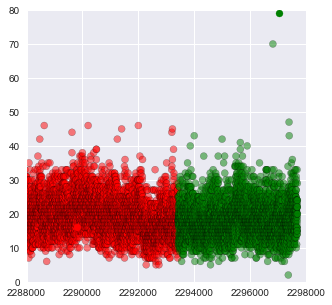

In [14]:
## Assignment Stage

def assignment(df1, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df1['distance_from_{}'.format(i)] = (
            np.sqrt((df1['a'] - centroids[i][0]) ** 2 + (df1['b'] - centroids[i][1]) ** 2)
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df1['closest'] = df1.loc[:, centroid_distance_cols].idxmin(axis=1)
    df1['closest'] = df1['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df1['color'] = df1['closest'].map(lambda x: colmap[x])
    return df1

df1 = assignment(df1, centroids)
print(df1[ (df1['color'] == 'g')])
#print (df1.head(50))
fig = plt.figure(figsize=(5, 5))
plt.scatter(df1['a'], df1['b'], color=df1['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(2288000, 2298000)
plt.ylim(0, 80)
plt.show()